In [1564]:
import pandas as pd
import numpy as np

import openpyxl

data = pd.read_excel('FR2209_assessment_data.xlsx', index_col=0, header=0)
data = data.iloc[:121,:]

stocks = data.loc[:,['EBAY','NVDA','EL','BP','AMZN','META']]

returns = stocks.pct_change() 
std = returns.std()
mean = returns.mean()


returns



,EBAY,NVDA,EL,BP,AMZN,META
date,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.022512,0.038887,0.055065,-0.190283,-0.004634,-0.120428
2013-03-29,-0.008956,0.013428,-0.001092,-0.253121,0.008401,-0.061285
2013-04-30,-0.033751,0.073266,0.083086,0.143845,-0.047582,0.085575
2013-05-31,0.032640,0.056117,-0.020097,0.038624,0.060636,-0.123195
...,...,...,...,...,...,...
2022-08-31,-0.088011,-0.168970,-0.066373,-0.029456,-0.060615,0.024073
2022-09-30,-0.165874,-0.195539,-0.151270,0.057179,-0.108622,-0.167250
2022-10-31,0.082315,0.111871,-0.071376,0.145947,-0.093451,-0.313384


In [1565]:
mean

EBAY    0.008855
NVDA    0.041067
EL      0.015018
BP      0.002135
AMZN    0.019445
META    0.016668
dtype: float64

In [1566]:
#asssume the risk free of 0.1%, calculate the excess return for each stock
R_f = 0.001
excessret = mean - R_f
excessret

EBAY    0.007855
NVDA    0.040067
EL      0.014018
BP      0.001135
AMZN    0.018445
META    0.015668
dtype: float64

In [1567]:
#sharpe for each stock
sharpe = excessret/std
df = pd.DataFrame({'Mean': mean, 'Volatility': std, 'Sharpe': sharpe})
df


,Mean,Volatility,Sharpe
EBAY,0.008855,0.087006,0.090282
NVDA,0.041067,0.122579,0.326869
EL,0.015018,0.067556,0.207507
BP,0.002135,0.145622,0.007794
AMZN,0.019445,0.088843,0.207610
META,0.016668,0.103125,0.151929


In [1568]:
#returns variance / covariance matrix 
VarCov_Mat = returns.cov()
VarCov_Mat

,EBAY,NVDA,EL,BP,AMZN,META
EBAY,0.007570,0.005029,0.002191,0.002801,0.003704,0.003796
NVDA,0.005029,0.015026,0.002851,0.000952,0.005335,0.003476
EL,0.002191,0.002851,0.004564,0.002458,0.001558,0.002497
BP,0.002801,0.000952,0.002458,0.021206,0.000539,0.001247
AMZN,0.003704,0.005335,0.001558,0.000539,0.007893,0.003480
META,0.003796,0.003476,0.002497,0.001247,0.003480,0.010635


In [1595]:
CorrMat = returns.corr()
CorrMat

,EBAY,NVDA,EL,BP,AMZN,META
EBAY,1.000000,0.471555,0.372730,0.221088,0.479215,0.423084
NVDA,0.471555,1.000000,0.344259,0.053355,0.489840,0.274976
EL,0.372730,0.344259,1.000000,0.249855,0.259657,0.358434
BP,0.221088,0.053355,0.249855,1.000000,0.041626,0.083060
AMZN,0.479215,0.489840,0.259657,0.041626,1.000000,0.379796
META,0.423084,0.274976,0.358434,0.083060,0.379796,1.000000


In [1569]:
import numpy as np
from itertools import combinations, permutations, product

# Generate permutations of weights in multiples of 0.1
permutations = product(range(11), repeat=len(mean))

# Filter permutations where the sum equals 10 (1 in multiples of 0.1)
valid_permutations = [p for p in permutations if sum(p) == 10]

# Convert permutations to multiples of 0.1 and normalize each permutation
normalized_permutations = [[weight / 10 for weight in p] for p in valid_permutations]


In [1570]:
weighted_ret = [[weight * mean for weight, mean in zip(p, mean)] for p in normalized_permutations]
# Sum of weights method
portfolio_rets = [sum(weights) for weights in weighted_ret]
# portfolio_rets

In [1571]:
# w^T mean method
portfolio_rets2 = np.dot(normalized_permutations, mean)

In [1572]:
# Initialize an empty list to store portfolio variances
portfolio_variances = []

# Iterate over each normalized permutation of weights
for weights in normalized_permutations:
    # Calculate portfolio variance using the given formula
    portfolio_variance = np.dot(np.dot(np.transpose(weights),VarCov_Mat),weights)
    # Append the portfolio variance to the list
    portfolio_variances.append(portfolio_variance)

portfolio_std = np.sqrt(portfolio_variances)

#portfolio_variances = np.dot(np.dot(normalized_permutations, VarCov_Mat), np.transpose(normalized_permutations))
portfolio_std
 

array([0.10312512, 0.09653731, 0.09074958, ..., 0.08106581, 0.08477726,
       0.08700561])

Text(0, 0.5, 'Returns')

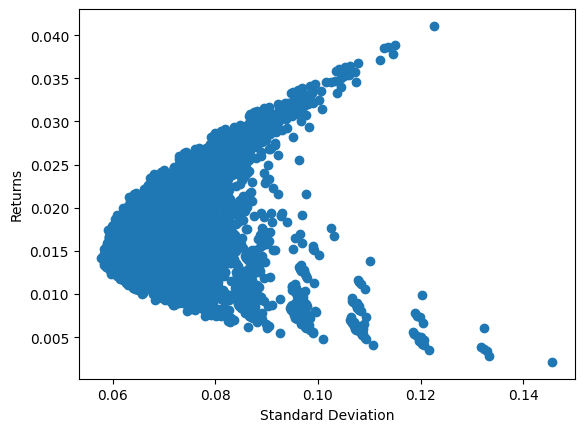

In [1573]:
import matplotlib.pyplot as plt
plt.scatter(portfolio_std, portfolio_rets)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [1574]:

sharpe_portolios = ((np.array(portfolio_rets) - R_f )) / portfolio_std
sharpe_portolios

array([0.15192934, 0.16517382, 0.17876823, ..., 0.1044996 , 0.13065105,
       0.0902817 ])

In [1575]:
max_sharpe_index = np.argmax(sharpe_portolios)
max_sharpe = max(sharpe_portolios)
# Retrieve the weights of the corresponding portfolio
optimal_weights = normalized_permutations[max_sharpe_index]
retmaxsharpe = portfolio_rets[max_sharpe_index]
stdmaxsharpe = portfolio_std[max_sharpe_index]
print('The portfolio with maximum Sharpe Ratio is: ', optimal_weights, ' with ratio: ', max_sharpe, ' The return on this portfolio is: ', retmaxsharpe, ' and Standard Deviation: ', stdmaxsharpe)

The portfolio with maximum Sharpe Ratio is:  [0.0, 0.5, 0.3, 0.0, 0.1, 0.1]  with ratio:  0.3455859654659602  The return on this portfolio is:  0.028650374839931905  and Standard Deviation:  0.0800101207890499


In [1576]:
min_std_index = np.argmin(portfolio_std)
min_std = min(portfolio_std)
# Retrieve the weights of the corresponding portfolio
min_std_weights = normalized_permutations[min_std_index]
retminstd = portfolio_rets[min_std_index]
print('The portfolio with minimum Standard Deviation is: ', min_std_weights, ' with Standard Deviation: ', min_std, ' The return on this portfolio is: ', retminstd)

The portfolio with minimum Standard Deviation is:  [0.1, 0.0, 0.5, 0.1, 0.2, 0.1]  with Standard Deviation:  0.05781742372671718  The return on this portfolio is:  0.014163897553766888


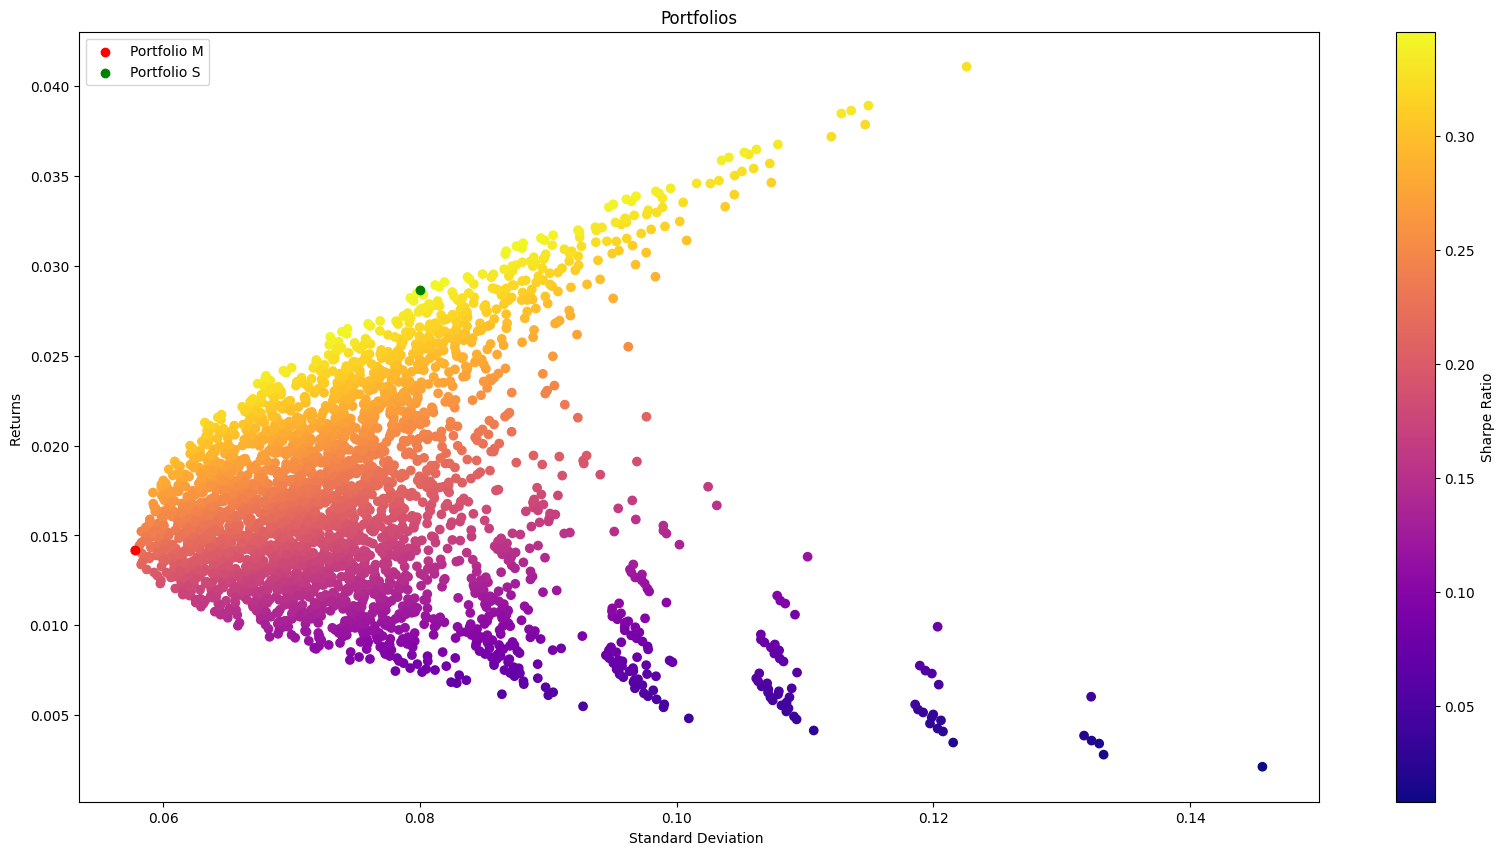

In [1577]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation ')
plt.ylabel('Returns ')
plt.show()

In [1578]:
#Ones Vector
one = np.empty((1, 6))
one[:] = 1

#Calculate A, B, and F
A = np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), mean)
B = np.dot(np.dot(mean.transpose(), np.linalg.inv(VarCov_Mat)), mean)
F = float(np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), one.transpose()))
#Calculate D
D = B * F - A ** 2

In [1579]:
#Calculate Alpha_0
alpha_0 = ((np.dot(B*np.linalg.inv(VarCov_Mat), one.transpose().reshape(6)) - np.dot(A * np.linalg.inv(VarCov_Mat), mean)))/D
alpha_0 = alpha_0.flatten()
alpha_0

array([ 0.50002296, -0.43827575,  0.56172026,  0.12530795,  0.24489704,
        0.00632754])

In [1580]:
#Calculate Alpha_1
alpha_1 = (np.dot((F*np.linalg.inv(VarCov_Mat)),mean) - np.dot((A*np.linalg.inv(VarCov_Mat)),one.transpose().reshape(6)))/D
alpha_1 = alpha_1.flatten()
alpha_1

array([-27.01885824,  29.78710384,  -2.6114857 ,  -4.03539866,
        -0.3004443 ,   4.17908306])

In [1581]:
MinPortfolioRet = min(portfolio_rets)
MaxPortfolioRet = max(portfolio_rets)
C = np.arange(MinPortfolioRet, MaxPortfolioRet, 0.0001)
StdVector = []

for ret in C:
    w = alpha_0 + alpha_1 * ret
    Stds = np.sqrt((np.dot(np.dot(np.transpose(w), VarCov_Mat), w)))
    StdVector.append(Stds)

FrontierMinStd = min(StdVector)

df = pd.DataFrame({"C": C, "Std": StdVector})
minstdpoint = df["Std"].idxmin()

NegC = df[df["C"] < df["C"][minstdpoint]]
PosC = df[df["C"] >= df["C"][minstdpoint]]


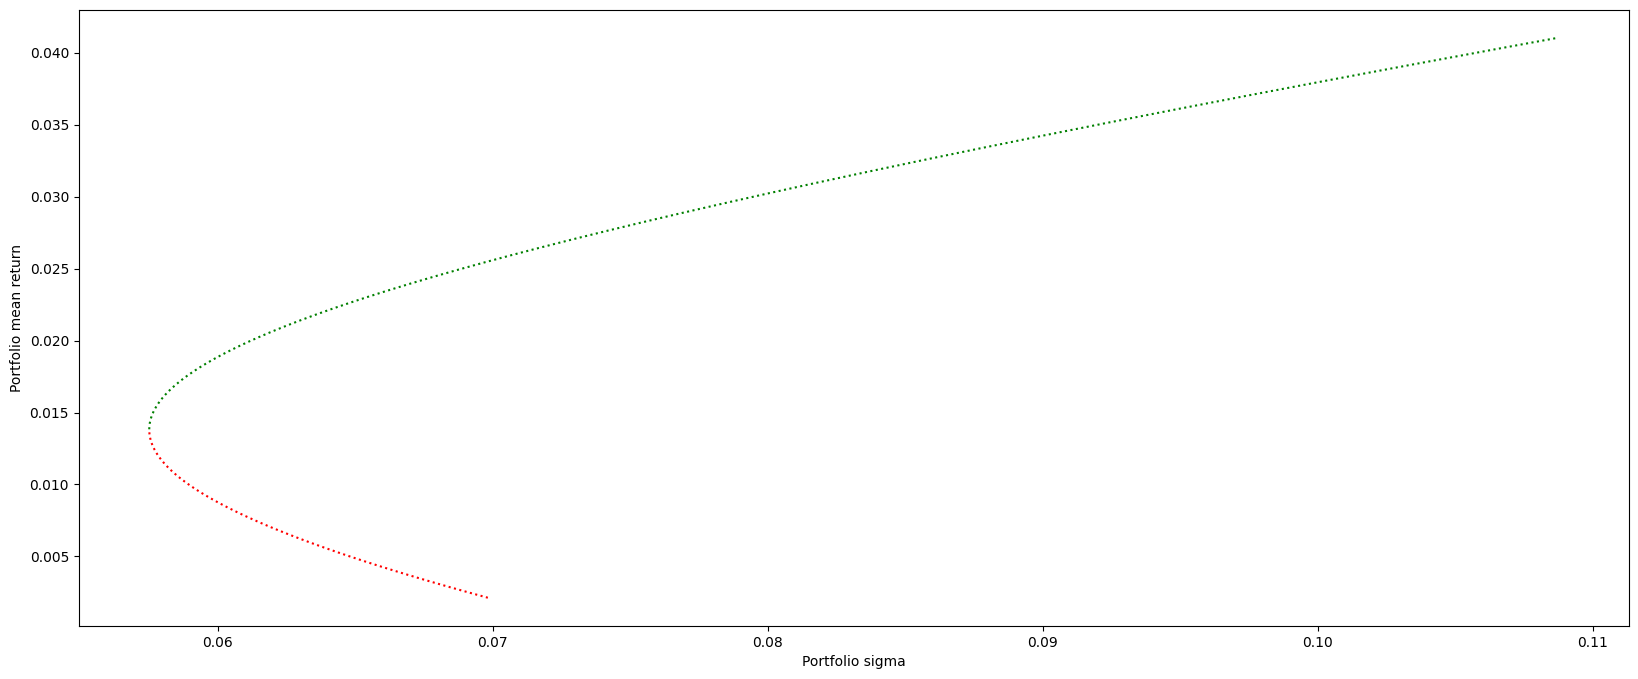

In [1582]:
plt.figure(figsize=(20, 8))
plt.plot( NegC['Std'], NegC['C'], linestyle = 'dotted', color='r')
plt.plot( PosC['Std'], PosC['C'],  linestyle = 'dotted', color='g')
plt.xlabel("Portfolio sigma")
plt.ylabel("Portfolio mean return")
plt.show()

In [1583]:
df['Sharpe'] = (df['C'] - R_f) / df['Std']
maximumsharpe = (df['Sharpe']).max()

StdVector = np.array(StdVector)

step = max(StdVector) / len(C)

vec = np.arange(0, max(StdVector), step)
CML = R_f + maximumsharpe * vec 
df['CML'] = CML
df


,C,Std,Sharpe,CML
0,0.002135,0.069816,0.016258,0.001000
1,0.002235,0.069625,0.017739,0.001103
2,0.002335,0.069434,0.019228,0.001206
3,0.002435,0.069245,0.020724,0.001309
4,0.002535,0.069056,0.022229,0.001412
...,...,...,...,...
385,0.040635,0.107596,0.368368,0.040682
386,0.040735,0.107883,0.368316,0.040785
387,0.040835,0.108170,0.368263,0.040888
388,0.040935,0.108458,0.368209,0.040991


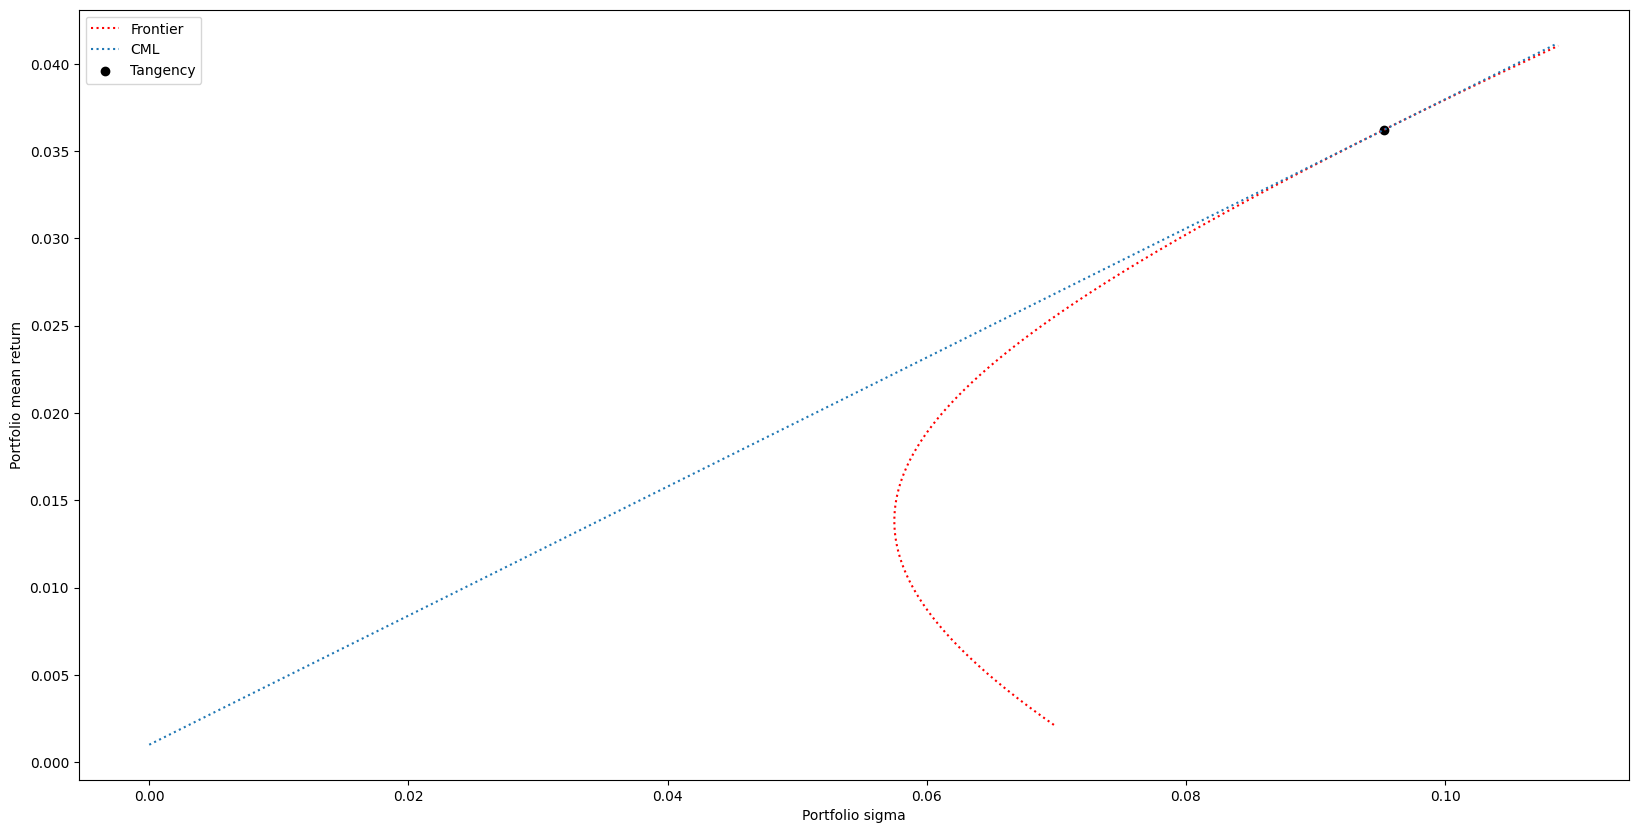

In [1584]:
index_of_max_sharpe = df['Sharpe'].idxmax()
# Find the value of the 'Std' column at the index of the maximum Sharpe ratio
Tangency_std = df.loc[index_of_max_sharpe, 'Std']
Tangency_ret = df.loc[index_of_max_sharpe, 'C']

plt.figure(figsize=(20, 10))
plt.plot(StdVector, C, linestyle = 'dotted', color='r' , label="Frontier")
plt.plot(vec , CML ,linestyle = 'dotted', label="CML" )
plt.scatter(Tangency_std, Tangency_ret, marker='o', color='black', label='Tangency')
plt.legend()
plt.xlabel("Portfolio sigma")
plt.ylabel("Portfolio mean return")
plt.show()

In [1585]:
#Target return per month = 1%
Traget = 0.01
Vol_p = (Traget - R_f) / maximumsharpe
weight_T = np.round((Vol_p / Tangency_std),2)
weight_rf = 1 - weight_T
print('The optimal allocation is: ', weight_T, 'on the tangency portfolio and ', weight_rf, 'on the risk free asset')

The optimal allocation is:  0.26 on the tangency portfolio and  0.74 on the risk free asset


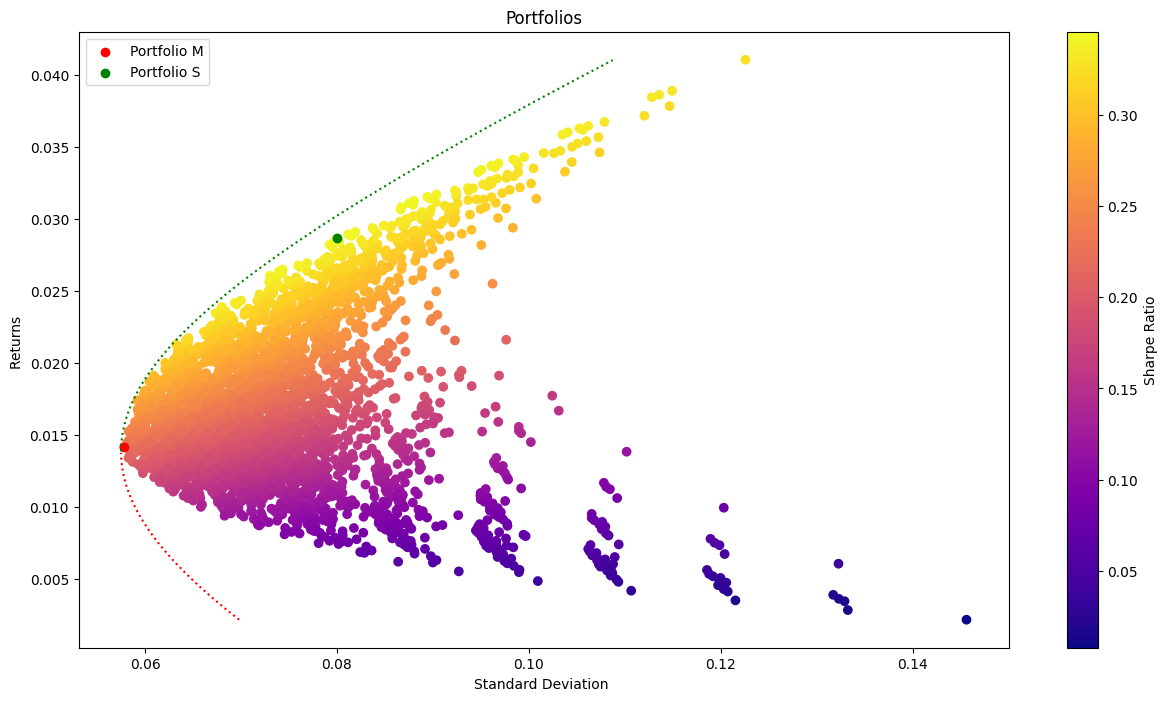

In [1586]:
plt.figure(figsize=(15, 8))
plt.plot( NegC['Std'], NegC['C'], linestyle = 'dotted', color='r')
plt.plot( PosC['Std'], PosC['C'],  linestyle = 'dotted', color='g')
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation ')
plt.ylabel('Returns ')
plt.show()

In [1587]:
Tangency_Monthly_Rets = returns.dot(optimal_weights)

In [1588]:
Tangency_Portfolio_Mean = Tangency_Monthly_Rets.mean()
Tangency_Portfolio_Mean

0.028650374839931894

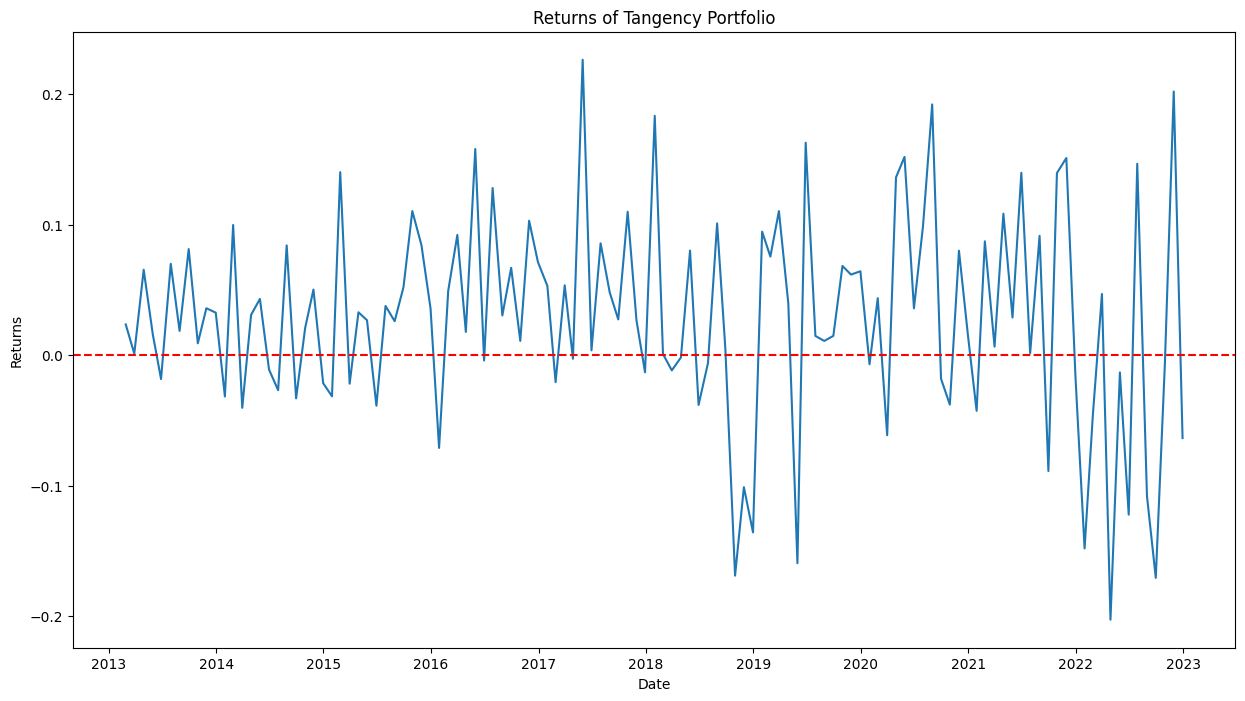

In [1589]:
plt.figure(figsize=(15, 8))
plt.plot(Tangency_Monthly_Rets)
plt.title('Returns of Tangency Portfolio')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [1590]:
print('The descriptive Statistics for the tangency portfolio: ')
print(Tangency_Monthly_Rets.describe())
print('meadian', Tangency_Monthly_Rets.median())

The descriptive Statistics for the tangency portfolio: 
count    119.000000
mean       0.028650
std        0.080010
min       -0.202834
25%       -0.013255
50%        0.027313
75%        0.080632
max        0.226315
dtype: float64
meadian 0.02731251170972353


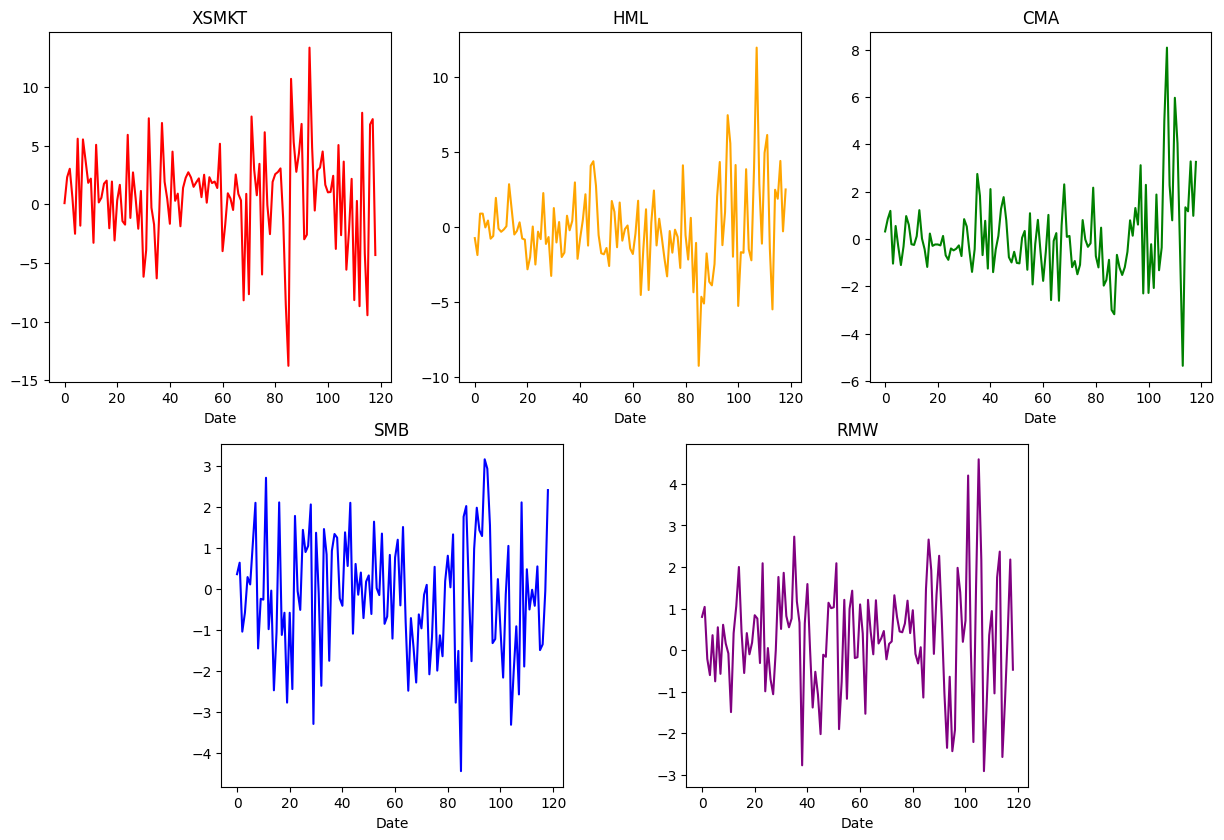

In [1591]:
factors = pd.read_excel('/Users/oscarxue/Downloads/FR2209_assessment_data_factors.xlsx')

fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[1][2].set_visible(False)


axs[0,0].plot(factors['XSMKT'], color='red')
axs[0,0].set_xlabel('Date')
axs[0,0].set_title("XSMKT")

axs[1,0].plot(factors['SMB'], color='blue')
axs[1,0].set_xlabel('Date')
axs[1,0].set_title("SMB")

axs[0,1].plot(factors['HML'], color='orange')
axs[0,1].set_xlabel('Date')
axs[0,1].set_title("HML")

axs[1,1].plot(factors['RMW'], color='purple')
axs[1,1].set_xlabel('Date')
axs[1,1].set_title("RMW")

axs[0,2].plot(factors['CMA'], color='green')
axs[0,2].set_xlabel('Date')
axs[0,2].set_title("CMA")

axs[1][0].set_position([0.24,0.125,0.228,0.343])
axs[1][1].set_position([0.55,0.125,0.228,0.343])

/var/folders/9_/mqsyyrcx6n93sgb32yjd96140000gn/T/ipykernel_28621/1453293376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(factors.corr(),annot = True )


<AxesSubplot: >

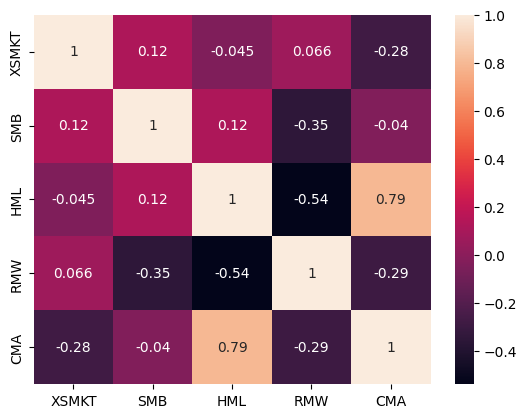

In [1592]:
import seaborn as sns
sns.heatmap(factors.corr(),annot = True )

In [1593]:
factors 

,Date,XSMKT,SMB,HML,RMW,CMA
0,2013-02-28,0.09,0.36,-0.73,0.80,0.32
1,2013-03-29,2.30,0.64,-1.86,1.04,0.84
2,2013-04-30,3.02,-1.04,0.90,-0.21,1.19
3,2013-05-31,0.56,-0.58,0.90,-0.60,-1.04
4,2013-06-28,-2.52,0.29,-0.02,0.36,0.55
...,...,...,...,...,...,...
114,2022-08-31,-4.22,0.55,2.49,-2.57,1.34
115,2022-09-30,-9.46,-1.49,1.89,-1.21,1.17
116,2022-10-31,6.79,-1.35,4.41,0.36,3.28
117,2022-11-30,7.25,-0.05,-0.28,2.18,0.98


In [1594]:
import statsmodels.api as sm
Tangency_Monthly_Rets.name = 'Returns'
factors = factors.rename(columns={'Date': 'date'})
merged_df = pd.merge(Tangency_Monthly_Rets, factors, on='date')
merged_df = merged_df.rename(columns={'date': 'Date'})
X = factors[['XSMKT', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)

y = merged_df['Returns']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     40.76
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           8.79e-24
Time:                        22:28:00   Log-Likelihood:                 193.53
No. Observations:                 119   AIC:                            -375.1
Df Residuals:                     113   BIC:                            -358.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.005      3.969      0.0